# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [10]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

In [3]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [4]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}

search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.914):
{'logistic__alpha': 0.01, 'pca__n_components': 30}


Text(0, 0.5, 'cumsum')

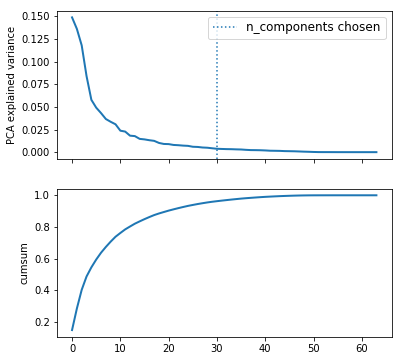

In [7]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

ax1.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
ax1.set_ylabel('cumsum')

#ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
#ax0.legend(prop=dict(size=12))



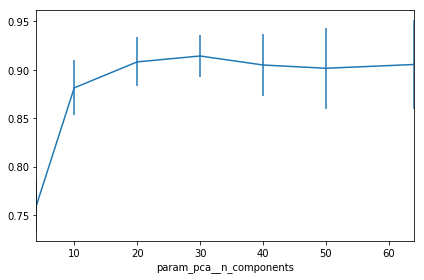

In [16]:
# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

,,mean_fit_time,mean_score_time,mean_test_score,param_logistic__alpha,param_pca__n_components,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
4,7,0.055053,0.000798,0.760195,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",13,0.769231,0.715470,0.793872,0.773109,0.749296,0.005140,0.001163,0.026464
10,8,0.053257,0.000599,0.881366,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",11,0.906593,0.859116,0.896936,0.907563,0.836620,0.008822,0.000489,0.028504
20,9,0.087566,0.000399,0.908171,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",3,0.928571,0.875691,0.905292,0.943978,0.887324,0.008907,0.000489,0.025283
30,10,0.209639,0.000599,0.914262,0.01,30,"{'logistic__alpha': 0.01, 'pca__n_components':...",1,0.928571,0.892265,0.924791,0.941176,0.884507,0.051840,0.000489,0.021951
40,4,0.124663,0.000799,0.904964,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",6,0.898352,0.856354,0.927577,0.949580,0.892958,0.011782,0.000747,0.031789
50,5,0.139627,0.000598,0.901589,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",7,0.898352,0.845304,0.941504,0.955182,0.867606,0.009097,0.000489,0.041950
64,6,0.163563,0.000598,0.905505,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",5,0.906593,0.837017,0.947075,0.960784,0.876056,0.027444,0.000489,0.045482


AttributeError: Unknown property yerr

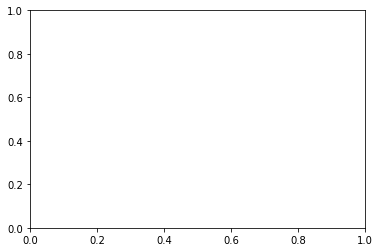

In [15]:
fig, axes = plt.subplots()
axes.plot(best_clfs[components_col], best_clfs['mean_test_score'], yerr=best_clfs['std_test_score'])